## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices


## Getting Started
In this project, I will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1) 
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, I will make a cursory investigation about the Boston housing data and provide observations. Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For first coding implementation, I will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported, I use this library to perform the necessary calculations.

In the code cell below, I will implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
- Store each calculation in their respective variable.

In [5]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Feature Observation
We are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

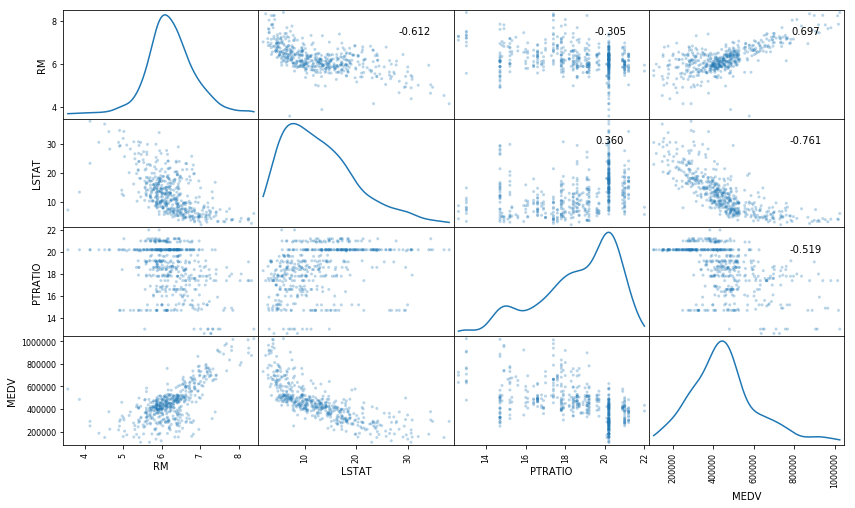

In [8]:
axes = pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

               RM     LSTAT   PTRATIO      MEDV
RM       1.000000 -0.612033 -0.304559  0.697209
LSTAT   -0.612033  1.000000  0.360445 -0.760670
PTRATIO -0.304559  0.360445  1.000000 -0.519034
MEDV     0.697209 -0.760670 -0.519034  1.000000


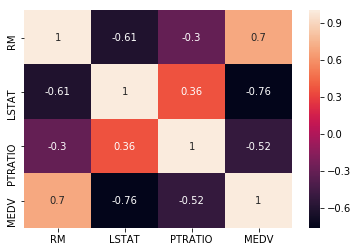

In [10]:
import seaborn as sns
ax = sns.heatmap(data.corr(), annot=True)
print(data.corr())

**Comment:** As the graph, we can see that.  
- There is a strong correlation between RM and MEDV. For example, a home that has an `'RM'` value(number of rooms) of 6 be worth less than a home that has an `'RM'` value of 7.
- However, a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more than a neighborhood that has an `'LSTAT'` value of 20.
- And a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more than a neighborhood that has an `'PTRATIO'` value of 15.

----

## Developing a Model
In this second section of the project, I will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, I will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [11]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [14]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 0)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


----

## Analyzing Model Performance
In this third section of the project, I'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, I'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

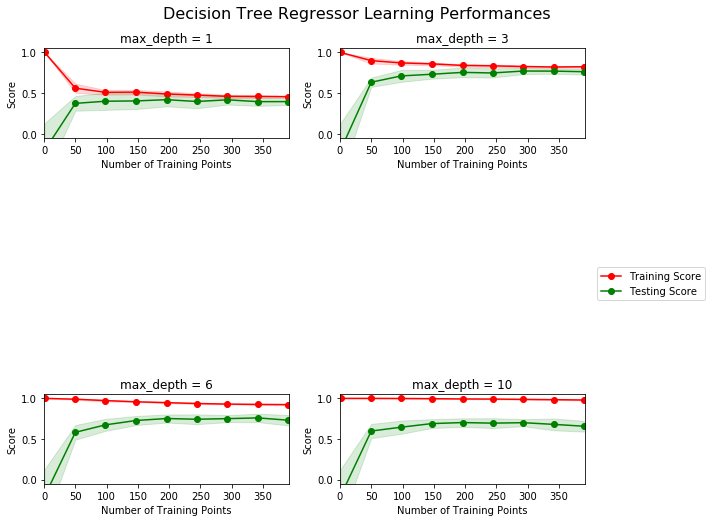

In [18]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

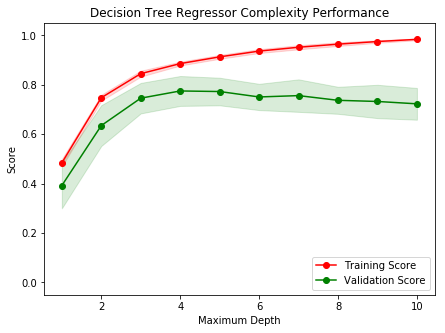

In [17]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff
- When the model is trained with a maximum depth of 1, the model suffer from high bias, since the score of both training and validation are approaching around 0.47 and 0.39. That means the model does bad on both traing and testing dataset, even when more data is provided.
- When the model is trained with a maximum depth of 10, the model suffers from high variance problem. This can be seen as the large distance between the training and validation score. In details, the training score is really high with almost 1 but the validation score stays below the value 0.8.

### Best-Guess Optimal Model
The graph suggests that the maximum depth can result in a best model is 3.
The reasons for that are:
    1. The training score and validation score both converge to the value 0.8 which is high
    2. The distance between the training and validation is as minimum as possible
Only at the maximum depth 3 the model can satisfy these conditions.

-----

## Evaluating Model Performance
In this final section of the project, I will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Implementation: Fitting a Model
Final implementation will bring everything together and train a model using the **decision tree algorithm**. To ensure that we are producing an optimized model, I will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In [22]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[i for i in range(1,11)]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Optimal Model

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [23]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


- The maximum depth of the model is 4,which is different from my guess in Question 6. The calculated value is higher than the my guessed value. 
- The reason might be the my guess focus more on avoiding overfitting instead of underfitting. Therefore, the distance between 2 scores is more important than the convergent value, which is higher with the maximum depth of 4.

In [27]:
#Score of the model
predictions = reg.predict(features)
score = performance_metric(prices, predictions)
print('R^2 = {:.2}'.format(score))

R^2 = 0.85


### Applicability
1. How relevant today is data that was collected from 1978? How important is inflation?
    It can be said that the data from 1978 are not relevant today data, especially for the price of house. Because
    the price can be impacted by so many factors. Futhermore, the adjusted value with inflation can not be used as
    the actual value since the inflation itself is an estimated value, and normally is simplified for calculation.
    
2. Are the features present in the data sufficient to describe a home? 
    Do you think factors like quality of apppliances in the home, 
    square feet of the plot area, presence of pool or not etc should factor in?
    Obviously, the factors are used for modelling the price of house in Boston are too simple. The price of house
    can be decided by many other factors say income, position of the house, quality of facilities. The factors should be used
    in the model must be consider base on the factors which are considered by the buyers.
    
3. Is the model robust enough to make consistent predictions?
    Since the model seems to be too simple for the predictions, and the input data is not good enough. It can be
    said that this model can not make consistent predictions.
    
4. Would data collected in an urban city like Boston be applicable in a rural city?
    No, it would not. Price of house in rural city is different from urban city.
    
5. Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?
    No, it is not fair to do that. Characteristics of the neighborhood should be considered when we need to estimate
    the price of house but not the main factor.
